In [ ]:
# mount drive and change directory to project folder
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
%cd "/content/drive/MyDrive/520 Final Project"

/content/drive/.shortcut-targets-by-id/1KHBlsdIi36o_ikonJZ-usBVzGPrZlH0V/520 Final Project


In [ ]:
import numpy as np
with open("X_train.npy", 'rb') as f:
  X_train = np.load(f)
with open("y_train.npy", 'rb') as f:
  y_train = np.load(f)
with open("X_test.npy", 'rb') as f:
  X_test = np.load(f)
with open("y_test.npy", 'rb') as f:
  y_test = np.load(f)

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 128)
pca.fit(X_train)
print(pca.explained_variance_ratio_)
print(pca.singular_values_)
print(pca.components_)

[0.0195896  0.0187731  0.01820343 0.01703799 0.01621233 0.01548068
 0.01455908 0.01283503 0.01242721 0.01229559 0.01207955 0.01143441
 0.01093362 0.01076343 0.00919955 0.00859743 0.00853567 0.00796556
 0.00781391 0.00775051 0.00761708 0.00750498 0.00721454 0.00713761
 0.00696388 0.00692699 0.00678084 0.00663774 0.00657626 0.00646807
 0.00630717 0.00622975 0.00612903 0.00601722 0.00599028 0.00594266
 0.00590475 0.00579461 0.00573275 0.00563173 0.00557414 0.00547505
 0.00541084 0.0052903  0.00527265 0.00519233 0.00505717 0.00503772
 0.00494155 0.0048954  0.00479782 0.00475626 0.00459255 0.00456752
 0.00447515 0.00440941 0.00433348 0.00422871 0.00416219 0.00409245
 0.00403131 0.00401448 0.00392451 0.00389173 0.00380327 0.0037365
 0.0036584  0.00364247 0.00356207 0.00352674 0.00347593 0.00343672
 0.00339214 0.00338365 0.00332722 0.00326455 0.00322144 0.00317391
 0.0031472  0.00313095 0.00311497 0.00304443 0.0030207  0.00299637
 0.00295824 0.00295215 0.00290448 0.00289278 0.00284695 0.00283

In [ ]:
pca.components_[0]

(128, 16384)

In [ ]:
# woah this works!
import scipy.io.wavfile
scipy.io.wavfile.write('eigenaudios/eigenaudio1.wav', 44100, 10*np.tile(pca.components_[0],10))

from IPython.display import Audio
from IPython.display import display
wn = Audio('eigenaudios/eigenaudio1.wav', autoplay=True)
display(wn)
# PCA was performed on a bunch of songs in A, so makes sense that first principal components would give us a Sol-Do fourth in this key

In [ ]:
scipy.io.wavfile.write('eigenaudios/eigenaudio2.wav', 44100, 10*np.tile(pca.components_[1],10))

from IPython.display import Audio
from IPython.display import display
wn = Audio('eigenaudios/eigenaudio2.wav', autoplay=True)
display(wn)

In [ ]:
scipy.io.wavfile.write('eigenaudios/eigenaudio3.wav', 44100, 15*np.tile(pca.components_[2],10))

from IPython.display import Audio
from IPython.display import display
wn = Audio('eigenaudios/eigenaudio3.wav', autoplay=True)
display(wn)

# Do semi-supervised learning on PCA-reduced data

In [ ]:
X_pca = pca.transform(X_train)
y_train_trunc = y_train[:,40:85]

In [ ]:
# train logistic regression
from sklearn.linear_model import LogisticRegression
from sklearn.multioutput import MultiOutputClassifier
clf = MultiOutputClassifier(LogisticRegression()).fit(X_pca, y_train_trunc)
y_pred_trunc = clf.predict(X_pca)
print(y_pred_trunc.shape)

(10000, 45)


In [ ]:
from sklearn.metrics import precision_score, recall_score, accuracy_score
precisions = []
recalls = []
accuracies = []
for i in range(len(y_pred_trunc[0])):
  recalls += [recall_score(y_train_trunc[:,i], y_pred_trunc[:,i])]
  precisions += [precision_score(y_train_trunc[:,i], y_pred_trunc[:,i], zero_division=0)]
  accuracies += [accuracy_score(y_train_trunc[:,i], y_pred_trunc[:,i])]
print(recalls)
print(precisions)
print(accuracies)

[0.030418250950570342, 0.010714285714285714, 0.003484320557491289, 0.013937282229965157, 0.022222222222222223, 0.0036496350364963502, 0.0, 0.0273972602739726, 0.0, 0.009259259259259259, 0.0018148820326678765, 0.01910828025477707, 0.02631578947368421, 0.0017301038062283738, 0.006896551724137931, 0.0020491803278688526, 0.005535055350553505, 0.004195804195804196, 0.0, 0.0062266500622665, 0.007594936708860759, 0.007462686567164179, 0.002849002849002849, 0.004672897196261682, 0.0032520325203252032, 0.004459308807134894, 0.0, 0.0038910505836575876, 0.0023584905660377358, 0.0006426735218508997, 0.008517887563884156, 0.0038461538461538464, 0.003424657534246575, 0.0011904761904761906, 0.0, 0.003194888178913738, 0.00423728813559322, 0.0016638935108153079, 0.0026917900403768506, 0.0, 0.0069605568445475635, 0.0025157232704402514, 0.0, 0.004739336492890996, 0.006006006006006006]
[0.8888888888888888, 1.0, 1.0, 1.0, 1.0, 0.6666666666666666, 0.0, 0.6, 0.0, 1.0, 1.0, 1.0, 0.8947368421052632, 1.0, 0.8, 

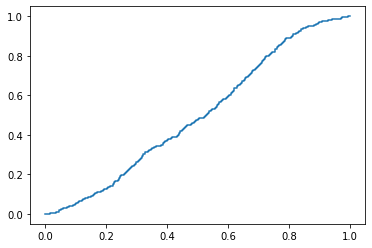

In [ ]:
# ROC curve for A4: MIDI 58, so index 34
import librosa
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt
y_scores = clf.predict_proba(X_pca)
y_scores = np.array(y_scores)
fpr, tpr, thresholds = roc_curve(y_train[:,58], y_scores[17,:,0])
plt.plot(fpr, tpr)
plt.show() # no better than random

In [ ]:
# get AUC
from sklearn.metrics import auc
print(auc(fpr, tpr)) # worse than random!

0.4990086123877014


# Try semi-supervised learning with less extreme dimensionality reduction

In [ ]:
X_train.shape

(74189, 16384)

In [ ]:
from sklearn.decomposition import PCA
X_train_reduced = X_train[::7,:]
pca = PCA(n_components = 84*32) # same amount of dimensionality reduction as we do with constant Q transform
pca.fit(X_train_reduced)

PCA(n_components=2688)

In [ ]:
X_pca = pca.transform(X_train)
y_train_trunc = y_train[:,40:85]

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.multioutput import MultiOutputClassifier
clf = MultiOutputClassifier(LogisticRegression(max_iter=500)).fit(X_pca, y_train_trunc)

In [ ]:
y_pred_trunc = clf.predict(X_pca)

In [ ]:
from sklearn.metrics import precision_score, recall_score, accuracy_score
precisions = []
recalls = []
accuracies = []
for i in range(len(y_pred_trunc[0])):
  recalls += [recall_score(y_train_trunc[:,i], y_pred_trunc[:,i])]
  precisions += [precision_score(y_train_trunc[:,i], y_pred_trunc[:,i], zero_division=0)]
  accuracies += [accuracy_score(y_train_trunc[:,i], y_pred_trunc[:,i])]
print(recalls)
print(precisions)
print(accuracies)

[0.05569155446756426, 0.04829308909242298, 0.04331797235023042, 0.035463365674138506, 0.030105368790767688, 0.032528180354267314, 0.02514890800794176, 0.03260869565217391, 0.03832833063957516, 0.03259452411994785, 0.01967720539464957, 0.013383297644539615, 0.024137153169411233, 0.0221085327973689, 0.019879969992498126, 0.017205576980124593, 0.019934333958724203, 0.021201873048907388, 0.01403061224489796, 0.018282231955817938, 0.022375423318819546, 0.010881593507930653, 0.02107848153074798, 0.016401758539059858, 0.023071377072819033, 0.028938906752411574, 0.019972852433585417, 0.029242569511025888, 0.017901352123405066, 0.024973242953977882, 0.02537977028529085, 0.026236125126135216, 0.04029358897543439, 0.023454157782515993, 0.023272415762421474, 0.02384780278670954, 0.03368200836820084, 0.03642311886586696, 0.03570153516601214, 0.041031652989449004, 0.044309296264118156, 0.044457443696987425, 0.06977840641206978, 0.0629004076878276, 0.08676975945017182]
[1.0, 0.9914529914529915, 1.0, 

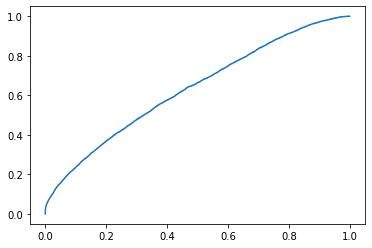

In [ ]:
# ROC curve for A3: MIDI 57, so index 17
import librosa
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt
y_scores = clf.predict_proba(X_pca)
y_scores = np.array(y_scores)
fpr, tpr, thresholds = roc_curve(y_train[:,57], y_scores[17,:,1])
plt.plot(fpr, tpr)
plt.show()

In [ ]:
# get AUC
from sklearn.metrics import auc
print(auc(fpr, tpr)) # still doesn't beat baseline, but not bad

0.6327128592231195


# Try on the test set

In [ ]:
X_test_pca = pca.transform(X_test)
y_test_trunc = y_test[:, 40:85]

In [ ]:
y_test_pred = clf.predict(X_test_pca)

In [ ]:
precisions = []
recalls = []
accuracies = []
for i in range(len(y_test_pred[0])):
  recalls += [recall_score(y_test_trunc[:,i], y_test_pred[:,i])]
  precisions += [precision_score(y_test_trunc[:,i], y_test_pred[:,i], zero_division=0)]
  accuracies += [accuracy_score(y_test_trunc[:,i], y_test_pred[:,i])]
print(recalls)
print(precisions)
print(accuracies) # overfitting right now, it would appear (but intuitively makes sense, because I trained it on all songs in one key)

[0.0, 0.04477611940298507, 0.0, 0.0, 0.006211180124223602, 0.006802721088435374, 0.03867403314917127, 0.0, 0.02247191011235955, 0.017543859649122806, 0.011111111111111112, 0.006369426751592357, 0.008620689655172414, 0.027972027972027972, 0.007246376811594203, 0.02689486552567237, 0.0, 0.024154589371980676, 0.03341288782816229, 0.0, 0.03187250996015936, 0.005714285714285714, 0.024691358024691357, 0.02617801047120419, 0.015789473684210527, 0.052486187845303865, 0.01702127659574468, 0.022727272727272728, 0.016736401673640166, 0.026022304832713755, 0.04797047970479705, 0.019417475728155338, 0.03398058252427184, 0.005, 0.014164305949008499, 0.02909090909090909, 0.014705882352941176, 0.09714285714285714, 0.02877697841726619, 0.0423728813559322, 0.06363636363636363, 0.024096385542168676, 0.1095890410958904, 0.03125, 0.04054054054054054]
[0.0, 0.05263157894736842, 0.0, 0.0, 0.022727272727272728, 0.017857142857142856, 0.109375, 0.0, 0.05128205128205128, 0.02127659574468085, 0.06382978723404255,

# Try PCA on constant-Q-transformed data now

In [ ]:
import numpy as np
with open("X_train_spec_db.npy", 'rb') as f:
  X_train = np.load(f)
with open("y_train_spec.npy", 'rb') as f:
  y_train = np.load(f)
with open("X_test_spec_db.npy", 'rb') as f:
  X_test = np.load(f)
with open("y_test_spec.npy", 'rb') as f:
  y_test = np.load(f)

In [ ]:
X_train_flattened = np.reshape(X_train, (X_train.shape[0],-1))
X_test_flattened = np.reshape(X_test, (X_test.shape[0], -1))
print(X_train_flattened.shape, X_test_flattened.shape)

(326580, 2688) (3981, 2688)


In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 128)
pca.fit(X_train_flattened)
print(pca.explained_variance_ratio_)
print(pca.singular_values_)
print(pca.components_)

[0.18137218 0.15524226 0.08373838 0.0333782  0.02175124 0.01945772
 0.01836085 0.01768807 0.01754516 0.01662204 0.01622211 0.01571038
 0.01356647 0.01213653 0.01088564 0.01005217 0.00943621 0.0091639
 0.00913522 0.0087852  0.00841994 0.00819589 0.00768123 0.0061806
 0.00553319 0.00450553 0.00431457 0.00427978 0.00417672 0.00408259
 0.0033999  0.00310226 0.00297277 0.00282819 0.00279694 0.00274798
 0.00267744 0.00258617 0.00248656 0.00247571 0.00240317 0.00237492
 0.002247   0.00215406 0.00208925 0.00198844 0.0019669  0.00192364
 0.00191872 0.00185724 0.00184772 0.00180036 0.00177629 0.00170975
 0.00162076 0.00157819 0.00156923 0.00154669 0.00151399 0.00146451
 0.00143487 0.00141279 0.00140591 0.00132001 0.001288   0.001267
 0.0012305  0.00122465 0.00117494 0.00116098 0.00111456 0.00108216
 0.00106161 0.00104387 0.00100622 0.00099858 0.00096673 0.00096104
 0.00092833 0.00090392 0.00086678 0.0008563  0.00084585 0.00082797
 0.00080963 0.00079753 0.00078192 0.00077066 0.00075208 0.00074024

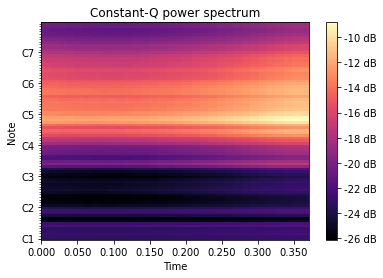

In [ ]:
# visualize eigenspectrums
import matplotlib.pyplot as plt
import librosa.display
C = 1000*np.reshape(pca.components_[0], (84, 32)) # since components normalized no clear scale...
fig, ax = plt.subplots()
img = librosa.display.specshow(C, sr=44100, x_axis='time', y_axis='cqt_note', ax=ax)
ax.set_title('Constant-Q power spectrum')
fig.colorbar(img, ax=ax, format="%+2.0f dB")
plt.show()

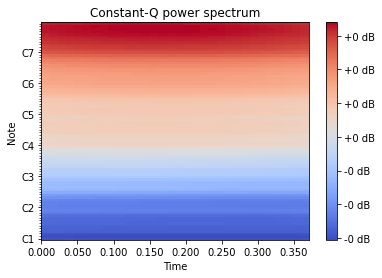

In [ ]:
C = np.reshape(pca.components_[1], (84, 32))
fig, ax = plt.subplots()
img = librosa.display.specshow(C, sr=44100, x_axis='time', y_axis='cqt_note', ax=ax)
ax.set_title('Constant-Q power spectrum')
fig.colorbar(img, ax=ax, format="%+2.0f dB")
plt.show()

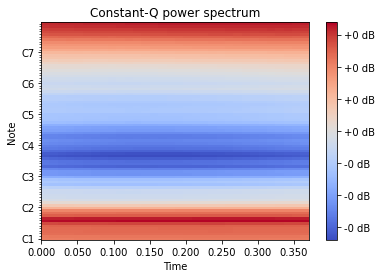

In [ ]:
C = np.reshape(pca.components_[2], (84, 32))
fig, ax = plt.subplots()
img = librosa.display.specshow(C, sr=44100, x_axis='time', y_axis='cqt_note', ax=ax)
ax.set_title('Constant-Q power spectrum')
fig.colorbar(img, ax=ax, format="%+2.0f dB")
plt.show()

# Semi-supervised learn this

In [ ]:
X_pca = pca.transform(X_train_flattened)
y_train_trunc = y_train[:,40:85]

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.multioutput import MultiOutputClassifier
clf = MultiOutputClassifier(LogisticRegression(max_iter=500)).fit(X_pca, y_train_trunc)

In [ ]:
y_pred_trunc = clf.predict(X_pca)

In [ ]:
from sklearn.metrics import precision_score, recall_score, accuracy_score
precisions = []
recalls = []
accuracies = []
for i in range(len(y_pred_trunc[0])):
  recalls += [recall_score(y_train_trunc[:,i], y_pred_trunc[:,i])]
  precisions += [precision_score(y_train_trunc[:,i], y_pred_trunc[:,i], zero_division=0)]
  accuracies += [accuracy_score(y_train_trunc[:,i], y_pred_trunc[:,i])]
print(recalls)
print(precisions)
print(accuracies)

[0.45495779261685776, 0.455837870538415, 0.4392670984046754, 0.48232567123816883, 0.47566844919786094, 0.4494358399327213, 0.46860343929129755, 0.3844536115829491, 0.3686770910896004, 0.37638017842946736, 0.4105147964069126, 0.41198960835253173, 0.38402710551790903, 0.41966244725738394, 0.38727618014107434, 0.3864717666207587, 0.35694102634217484, 0.4200930045833194, 0.4308591065292096, 0.4001140390176353, 0.43771551099649386, 0.4092864079914905, 0.41122708195272806, 0.412975296895373, 0.3792905814175635, 0.3849679477253724, 0.37676631068413935, 0.3899408284023669, 0.3700408954846326, 0.39588197146562903, 0.42270630868061276, 0.4011758985013925, 0.381350325568439, 0.3601753704423109, 0.3846740789186832, 0.326784368608031, 0.3202592888346094, 0.32905173737270355, 0.32056120774532326, 0.33506690229739966, 0.2415962441314554, 0.3102184828334916, 0.29857721466403575, 0.22333255867999072, 0.3025561279035864]
[0.7351384364820847, 0.7058548009367681, 0.7083545593479368, 0.7187679907887162, 0.

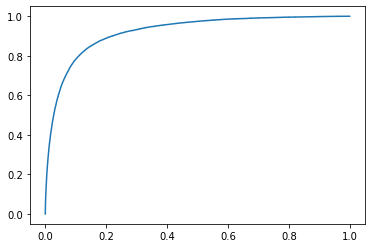

In [ ]:
# ROC curve for A3: MIDI 57, so index 17
import librosa
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt
y_scores = clf.predict_proba(X_pca)
y_scores = np.array(y_scores)
fpr, tpr, thresholds = roc_curve(y_train_trunc[:,17], y_scores[17,:,1])
plt.plot(fpr, tpr)
plt.show()

In [ ]:
from sklearn.metrics import auc
print(auc(fpr, tpr))

0.9208734601818787


In [ ]:
# get the average AUC over all the notes
aucs = []
for i in range(45):
  fpr, tpr, _ = roc_curve(y_train_trunc[:,i], y_scores[i,:,1])
  aucs += [auc(fpr,tpr)]
print(np.mean(aucs))

0.9259178351504933


# Evaluate on the test set

In [ ]:
X_test_pca = pca.transform(X_test_flattened)
y_test_trunc = y_test[:, 40:85]

In [ ]:
y_test_pred = clf.predict(X_test_pca)

In [ ]:
precisions = []
recalls = []
accuracies = []
for i in range(len(y_test_pred[0])):
  recalls += [recall_score(y_test_trunc[:,i], y_test_pred[:,i])]
  precisions += [precision_score(y_test_trunc[:,i], y_test_pred[:,i], zero_division=0)]
  accuracies += [accuracy_score(y_test_trunc[:,i], y_test_pred[:,i])]
print(recalls)
print(precisions)
print(accuracies)

[0.4444444444444444, 0.208955223880597, 0.35294117647058826, 0.6, 0.391304347826087, 0.5170068027210885, 0.24861878453038674, 0.4368932038834951, 0.2752808988764045, 0.3333333333333333, 0.5777777777777777, 0.37898089171974525, 0.25862068965517243, 0.32867132867132864, 0.3695652173913043, 0.3863080684596577, 0.32682926829268294, 0.3526570048309179, 0.3556085918854415, 0.6103896103896104, 0.4063745019920319, 0.2571428571428571, 0.4783950617283951, 0.4738219895287958, 0.17894736842105263, 0.3756906077348066, 0.425531914893617, 0.41919191919191917, 0.24686192468619247, 0.34572490706319703, 0.5129151291512916, 0.3446601941747573, 0.470873786407767, 0.385, 0.46458923512747874, 0.4909090909090909, 0.29411764705882354, 0.2914285714285714, 0.35251798561151076, 0.326271186440678, 0.4, 0.27710843373493976, 0.3698630136986301, 0.265625, 0.5]
[0.9230769230769231, 0.875, 1.0, 0.8426966292134831, 0.8289473684210527, 0.8837209302325582, 0.6617647058823529, 0.7894736842105263, 0.8448275862068966, 0.904

In [ ]:
print(np.mean(recalls))
print(np.mean(precisions))

0.38017219980369926
0.7149124492683417


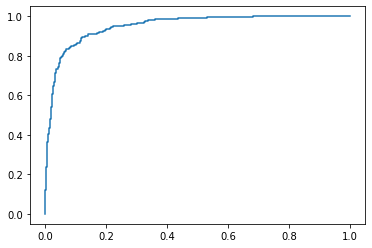

In [ ]:
y_test_scores = clf.predict_proba(X_test_pca)
y_test_scores = np.array(y_test_scores)
fpr, tpr, thresholds = roc_curve(y_test_trunc[:,20], y_test_scores[20,:,1])
plt.plot(fpr, tpr)
plt.show()

In [ ]:
import pickle
with open('pca_fpr.npy', 'wb') as f:
  np.save(f, fpr, allow_pickle=True)
with open('pca_tpr.npy', 'wb') as f:
  np.save(f, tpr, allow_pickle=True)

In [ ]:
print(auc(fpr, tpr))

0.9511647778857759


In [ ]:
# get the average AUC over all the notes
aucs = []
for i in range(45):
  fpr, tpr, _ = roc_curve(y_test_trunc[:,i], y_test_scores[i,:,1])
  aucs += [auc(fpr,tpr)]
print(np.mean(aucs))

0.9364459373285499
